In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import os
from CRFModel import CRFModel
from sklearn.model_selection import train_test_split
from division_plot import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
crf = CRFModel.load('classifiers/crf_arduino.pkl')

In [20]:
test_folder="/Volumes/Tesi/Arduino/bin"
paths = [f_path.path for f_path in os.scandir(test_folder)]
X = crf.preprocess(paths, extract_ground_truth=False)

ADXL3xx.ino.hex.bin
ADXL3xx.ino.with_bootloader.hex.bin
AnalogInOutSerial.ino.hex.bin
AnalogInOutSerial.ino.with_bootloader.hex.bin
AnalogInput.ino.hex.bin
AnalogInput.ino.with_bootloader.hex.bin
AnalogReadSerial.ino.hex.bin
AnalogReadSerial.ino.with_bootloader.hex.bin
AnalogWriteMega.ino.hex.bin
AnalogWriteMega.ino.with_bootloader.hex.bin


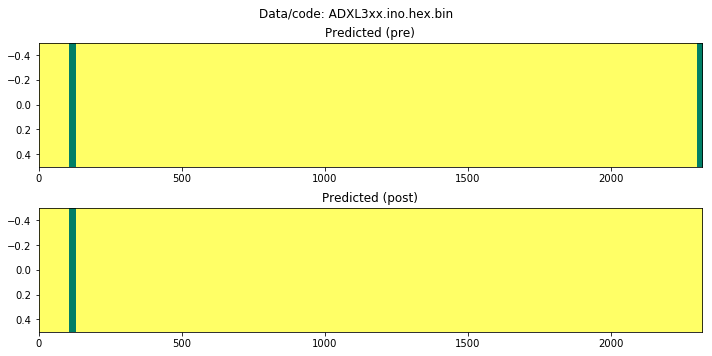

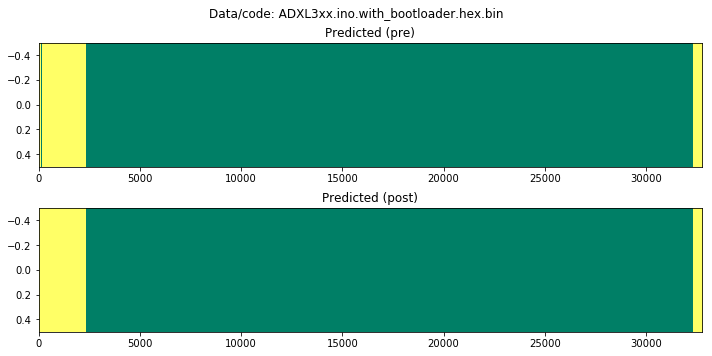

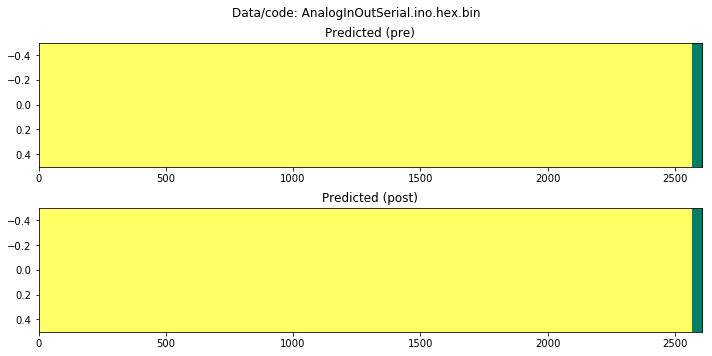

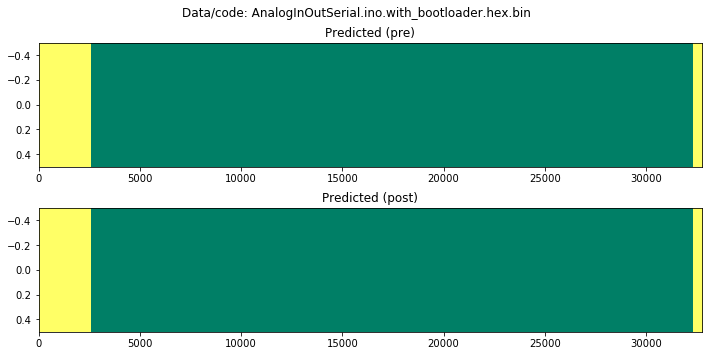

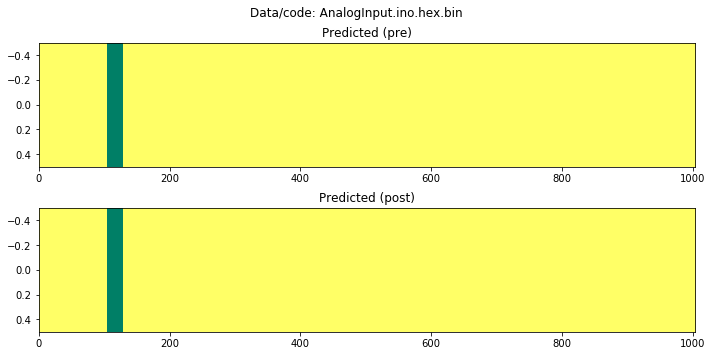

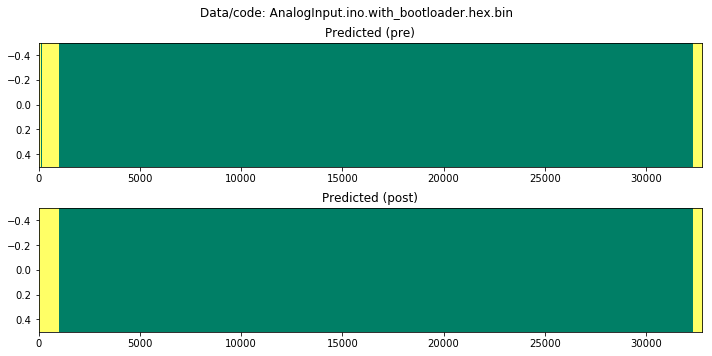

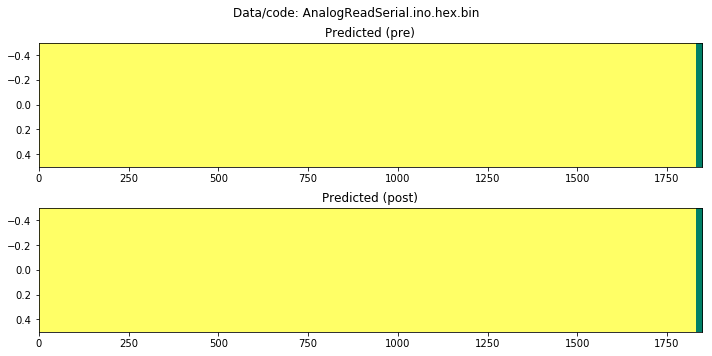

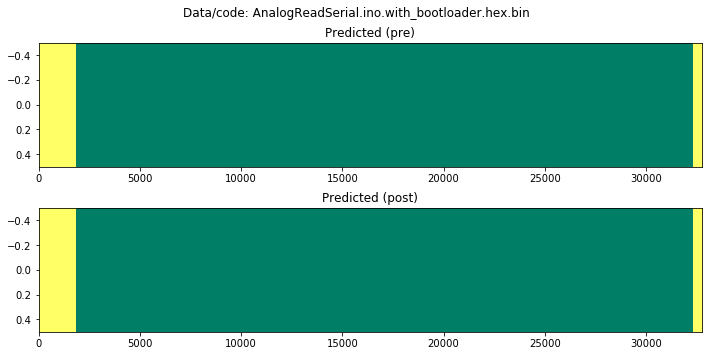

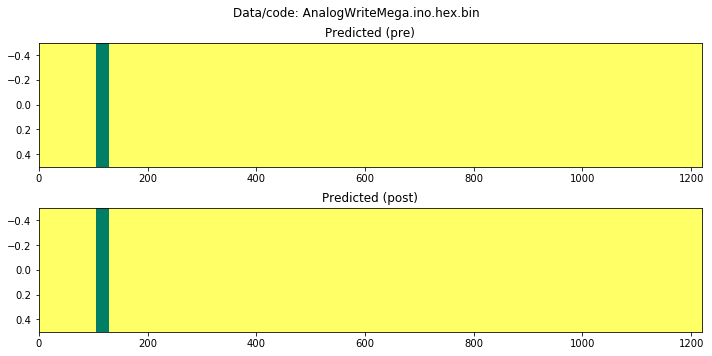

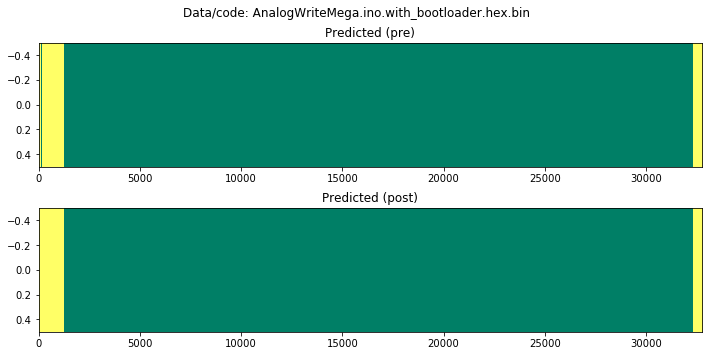

In [21]:
for x, path in list(zip(X, paths))[:10]:
    bin_name = path.split('/')[-1]
    print(bin_name)
    
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    
    predicted_bytes_pre = crf.predict([x])[0]
    predicted_bytes_post = crf.postprocess_prediction(predicted_bytes_pre)
    
    plot_barcode(predicted_bytes_pre, ax1)
    plot_barcode(predicted_bytes_post, ax2)
    
    ax1.set_title('Predicted (pre)')
    ax2.set_title('Predicted (post)')
    fig.suptitle('Data/code: {}'.format(bin_name))
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)